Lab1的第二部分是一个**多变量**线性回归，是一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标变量（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path =  'ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于这个任务，我们还需要一个数据预处理的过程——**数据归一化**，直接使用pandas库就可以完成

In [5]:
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


重复之前的步骤

In [6]:
def computeCost(X, y, theta): # 计算代价函数
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X, y, theta, alpha, loops):
    temp = np.matrix(np.zeros(theta.shape)) # 定义一个暂存theta的矩阵
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(loops)
    
    for i in range(loops): # 迭代次数
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - (alpha / len(X) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

# add ones column
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
dfX = data.iloc[:,0:cols-1]
dfy = data.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X = np.matrix(dfX.values)
y = np.matrix(dfy.values)
theta = np.matrix(np.array([0,0,0]))

alpha = 0.01
loops = 1000

# perform linear regression on the data set
g, err = gradientDescent(X, y, theta, alpha, loops)

# get the cost (error) of the model
computeCost(X, y, g)

0.13070336960771892

In [10]:
g

matrix([[-1.10898288e-16,  8.78503652e-01, -4.69166570e-02]])

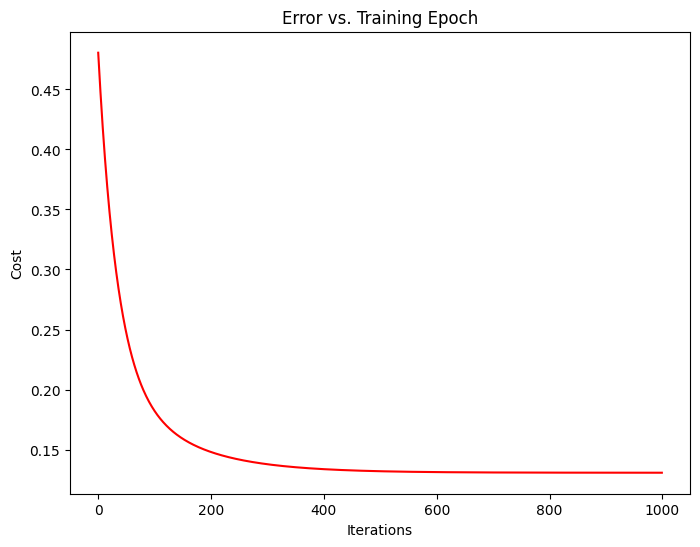

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(loops), err, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()